# Studentsourcing - aggregating and re-using data from a practical cell

biology course

[Joachim Goedhart](https://joachimgoedhart.github.io/) [](https://orcid.org/0000-0002-0630-3825) (Molecular Cytology, SILS - University of Amsterdam, The Netherlands)  
September 27, 2023

Data that is generated by students during a course is often lost as there is no centrally organized collection and storage of the data. The loss of data prevents its re-use. To provide access to these data, I present an approach that I call studentsourcing. It collects, aggregates and re-uses data that is generated by students in a practical course on cell biology. The course runs annually and I have recorded the data that was generated by \>100 students over 3 years. Two use cases illustrate how the data can be aggregated and re-used either for the scientific record or for teaching. As the data is obtained by different students, in different groups, over different years, it is an excellent opportunity to discuss experimental design and modern data visualization methods such as the superplot. The first use case demonstrates how the data can be presented as an online, interactive dashboard, providing real-time data of the measurements. The second use case shows how central data storage provides a unique opportunity to get precise quantitative data due to the large sample size. Both use cases illustrate how data can be effectively aggregated and re-used.

## Introduction

Teaching practical skills in a lab course is a crucial part of education in biology, biomedical science, and life sciences \[@hofstein2003; @reid2007\]. In these lab courses data is generated, reported and interpreted, much like *real* experimental lab work. However, students use their data just for their own lab report and the data is not centrally stored or aggregated. As a consequence, most of the data that is gathered in a lab course is lost. Yet, these data are potentially useful. Especially for larger course, an impressive amount of data under well-controlled conditions can be generated. Therefore, by collecting and aggregating the data of multiple students over multiple years, one can easily gather a large dataset with high numbers of independent observations \[@lazic2018\].

Microscopy is an essential tool in cell biology. The use of microscopes to observe cells and organisms has changed from a qualitative, descriptive approach, into a quantitative method \[@senft2023; @renz2013; @wait2020; @waters2009\]. The development of digital cameras and image analysis software has catalyzed this transition \[@carpenter2007\]. Therefore, experiments that use microscopes are often followed by bioimage analysis to extract quantitative information from the data. To teach these skills, we combine a basic course on microscopy in a course on cell biology with teaching image processing and analysis in ImageJ/FIJI \[@schneider2012\]. In a typical year, over one hundred students are enrolled in this course and therefore, a substantial amount of data is generated in the course.

I decided to collect the data that was generated by the students in the lab course over several years and store the measurement results in a central location. The data by itself can be valuable for the scientific community as precise estimates with good statistics can be obtained. Moreover, the data are a starting point to discuss data visualization, experimental design and how experimental design affects the statistics and interpretation of data. Here, I report the methods to collect, process and visualize the data. The data re-use is demonstrated in two use cases.

## Methods

For full reproducibility, this document is written using Quarto (Posit, <https://quarto.org/>), and the source code of the manuscript and the notebooks, and the data are availble in a repository: <https://github.com/JoachimGoedhart/MS-StudentSourcing>. A version rendered as HTML is avalaible and it provides easy access to the notebooks as well: <https://joachimgoedhart.github.io/MS-StudentSourcing/>

### Use case 1

*Sample preparation and measurements*

A buccal swab is used to harvest cheek cells by scraping ~5 times over the inside of the cheek. The tip of the sample collector is dipped into an eppendorf tube with 40 µl PBS, and the cells are transferred to an object slide by touching the slide with the tip. Next, 10 µl of 0.1% methyleneblue solution is added and the sample is enclosed by a square coverslip (22 x 22 mm). The sample is used immediately to observe the cells with a Leica microscope, equipped with a Lumenera camera. A 20x or 40x objective is used to observe and image the cells. A separate image of a micrometer ([Electron Microscopy Sciences 6804208, Stage Micrometer S8, Horizontal Scale, 1 mm Length](https://www.fishersci.com/shop/products/stage-graticules-s8/5028481)) is acquired at the same magnification. The images are processed in ImageJ/FIJI and the dimensions of the images are calibrated with the micrometer image (@fig-students-side). The line tool is used to measure the diameter of the cells (the longest axis).

*Data collection*

The data of the measurements is collected through a Google Form, an example of which is shown in @fig-students-side. By submitting the form, the students give permission for the anonymous use of the data. The data that is recorded by the form is the group (A/B/C/D), the size measurements of the cheek cells and the size measurements of the nucleus. The data is aggregated in a Google Sheet which has four columns with data on Timestamp, Group, size of cells, size of nuclei. When correctly uploaded, the two columns with the size data have comma separated values of 10 measurements.

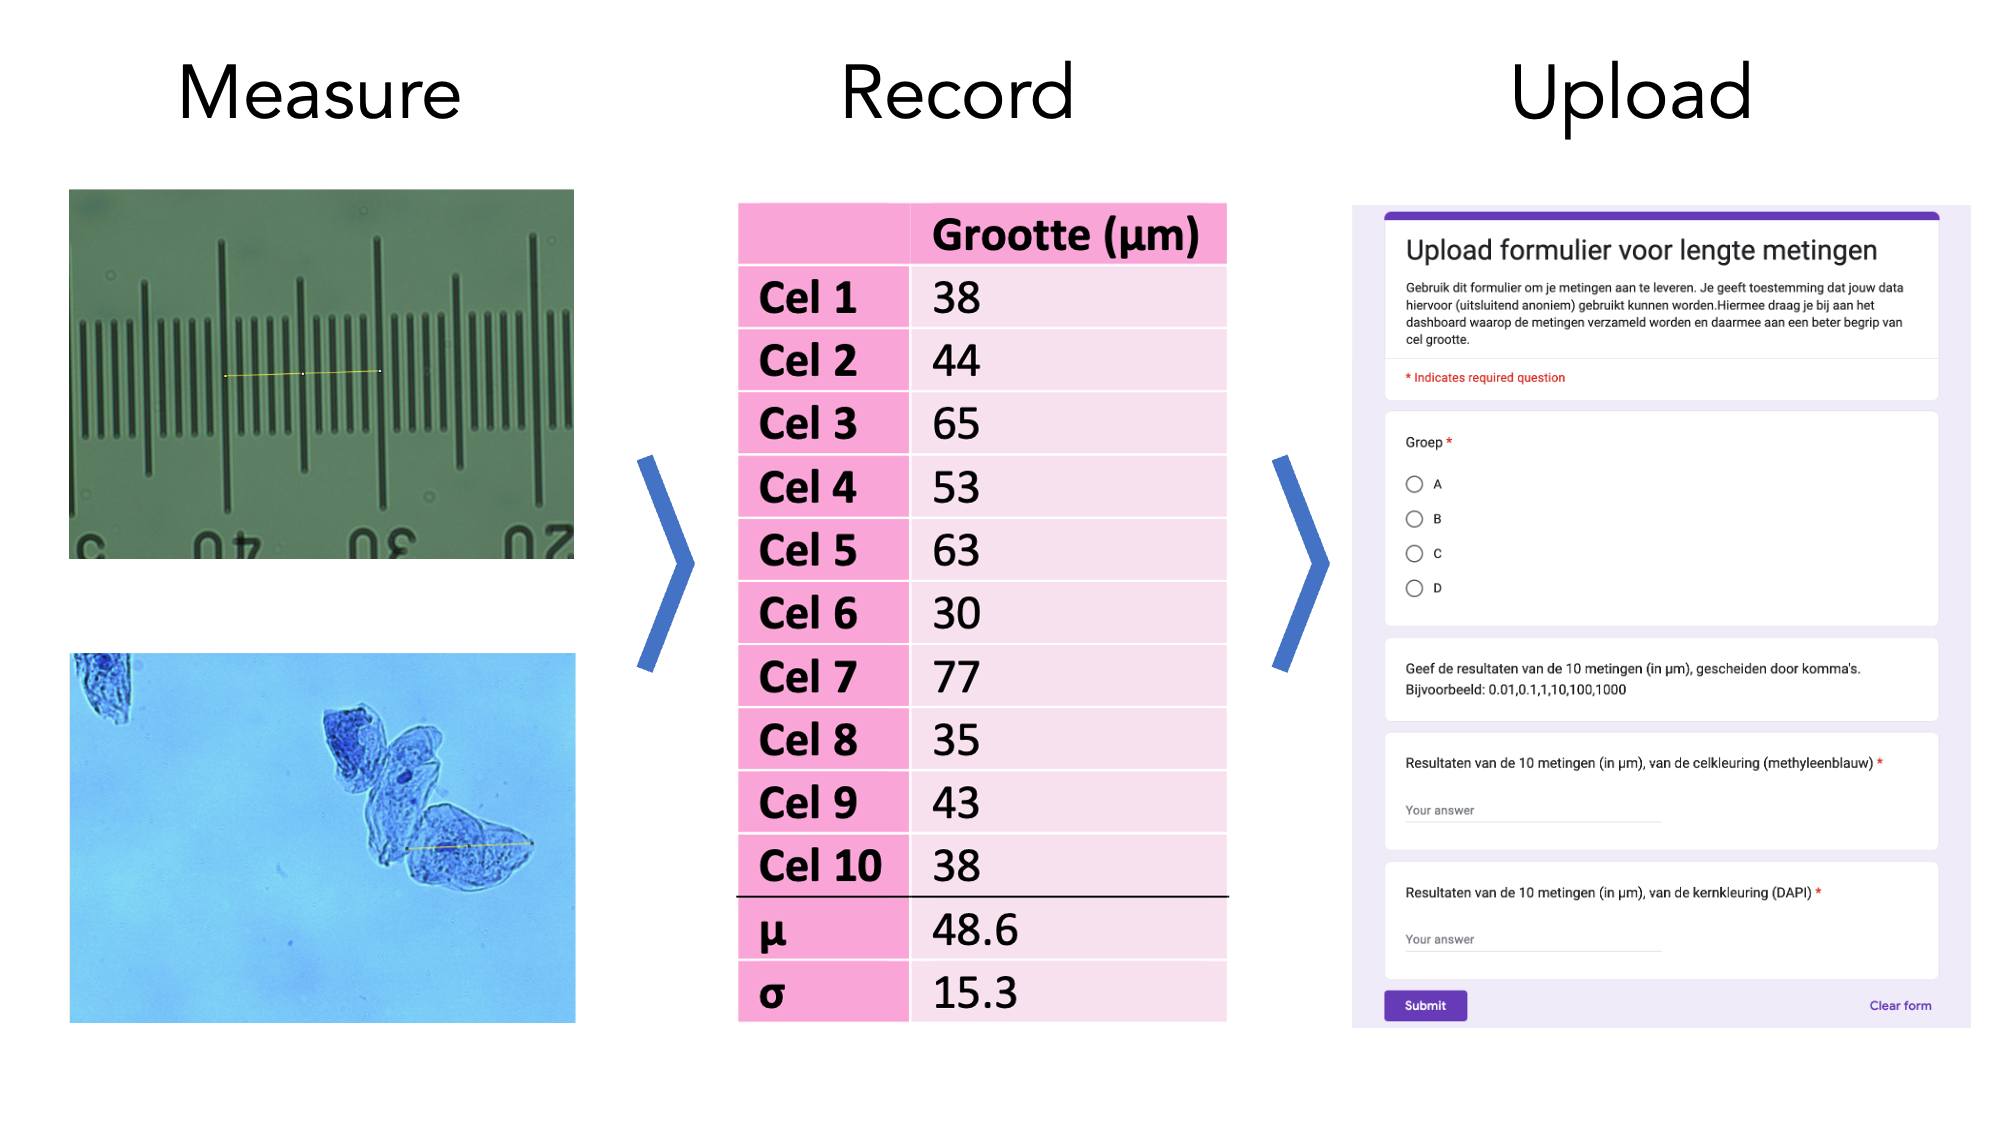{#fig-students-side }

*Data processing*

The data that is in the Google Sheet can be downloaded and read into R as a CSV. All subsequent processing and data visualisation and presentation in dashboard style is done in R. The code is available on Github: <https://github.com/JoachimGoedhart/CellSizeR>. The cleaning of the data consists of removing empty cells, changing the column names, listing all individual measurements in a single row, forcing the data into a ‘numeric’ type and filtering for sensible values (anything outside the generous range of 0-1000 will be removed). A detailed protocol that explains the processing is available as protocol 10 \[@goedhart2022\].

*Data visualisation*

A dashboard is composed in R Markdown with the `{flexdashboard}` package. The code is available here: <https://github.com/JoachimGoedhart/CellSizeR> and the live dashboard is available online: <https://amsterdamstudygroup.shinyapps.io/CellSizeR/>

### Use case 2

*Sample preparation and measurements*

HeLa cells are cultured according to standard procedures and seeded 1 or 2 days before the treatment on 12 mm diameter glass coverslips. HeLa cells are incubated with 10 µM EdU for 30 minutes at 37 ˚C. The cells are fixed with 4% formaldehyde in PBS and permeabilised with 0.1% Triton X-100 in PBS. Click chemistry is performed with 9 µM Cy3-azide and 2 mM CuSO<sub>4</sub>. To start the reaction, 20 mg/ml ascorbate (final concentration) is added and the solution is used immediately to stain the cells. After 30 minutes, the cells are washed 3x with PBS and the sample is incubated with 0.1 µg/ml DAPI for 5 minutes. Samples are mounted in Mowiol and used for observation with fluorescence microscopy. Images of at least 100 cells are acquired with the DAPI and TRITC filters sets. The nuclei in both channels are counted by hand, or in an automated way by segmentation and ‘particle analysis’ in imageJ to calculate the percentage of cells that are positive for Cy3 fluorescence, reflecting cells in the S-phase.

*Data collection*

The data of the measurements is collected through a Google Form. By submitting the form, the students give permission for the anonymous use of the data. The data that is recorded is the group (A/B/C/D), the percentage of cells in the S-phase for two methods, i.e. manual and using ImageJ/FIJI. The form is easy to set up and the data is collected in Google Sheets, yielding four columns; Timestamp, Group, and two columns with percentages of S-phase determined by the two methods.

*Data processing & visualization*

The data that is in the Google Sheet can be downloaded and read into R \[@RCore\] as a CSV. All subsequent processing and data visualization is done with R and quarto. The cleaning of the data consists of removing empty cells, changing the column names, conversion to a tidy format, forcing the data into a ‘numeric’ type and filtering for sensible values (anything outside the generous range of 0-100 will be removed).

## Results

### Use case 1: Comparing new results with historical data

The aim of the experiment is to determine the average size (diameter) of a human cheek cell and nucleus. To this end, the students acquire images of their own, stained cheek cells and measure the size of the cell and its nucleus. At least 10 measurements are made and the data are uploaded with a Google form. Each sample is an independent observation as it originates from a unique human specimen. To evaluate the accuracy of their own measurements, the students can compare their data with the historical data that is displayed on an online, interactive dashboard: <https://amsterdamstudygroup.shinyapps.io/CellSizeR/>. A snapshot of the dashboard is shown in @fig-dashboard.

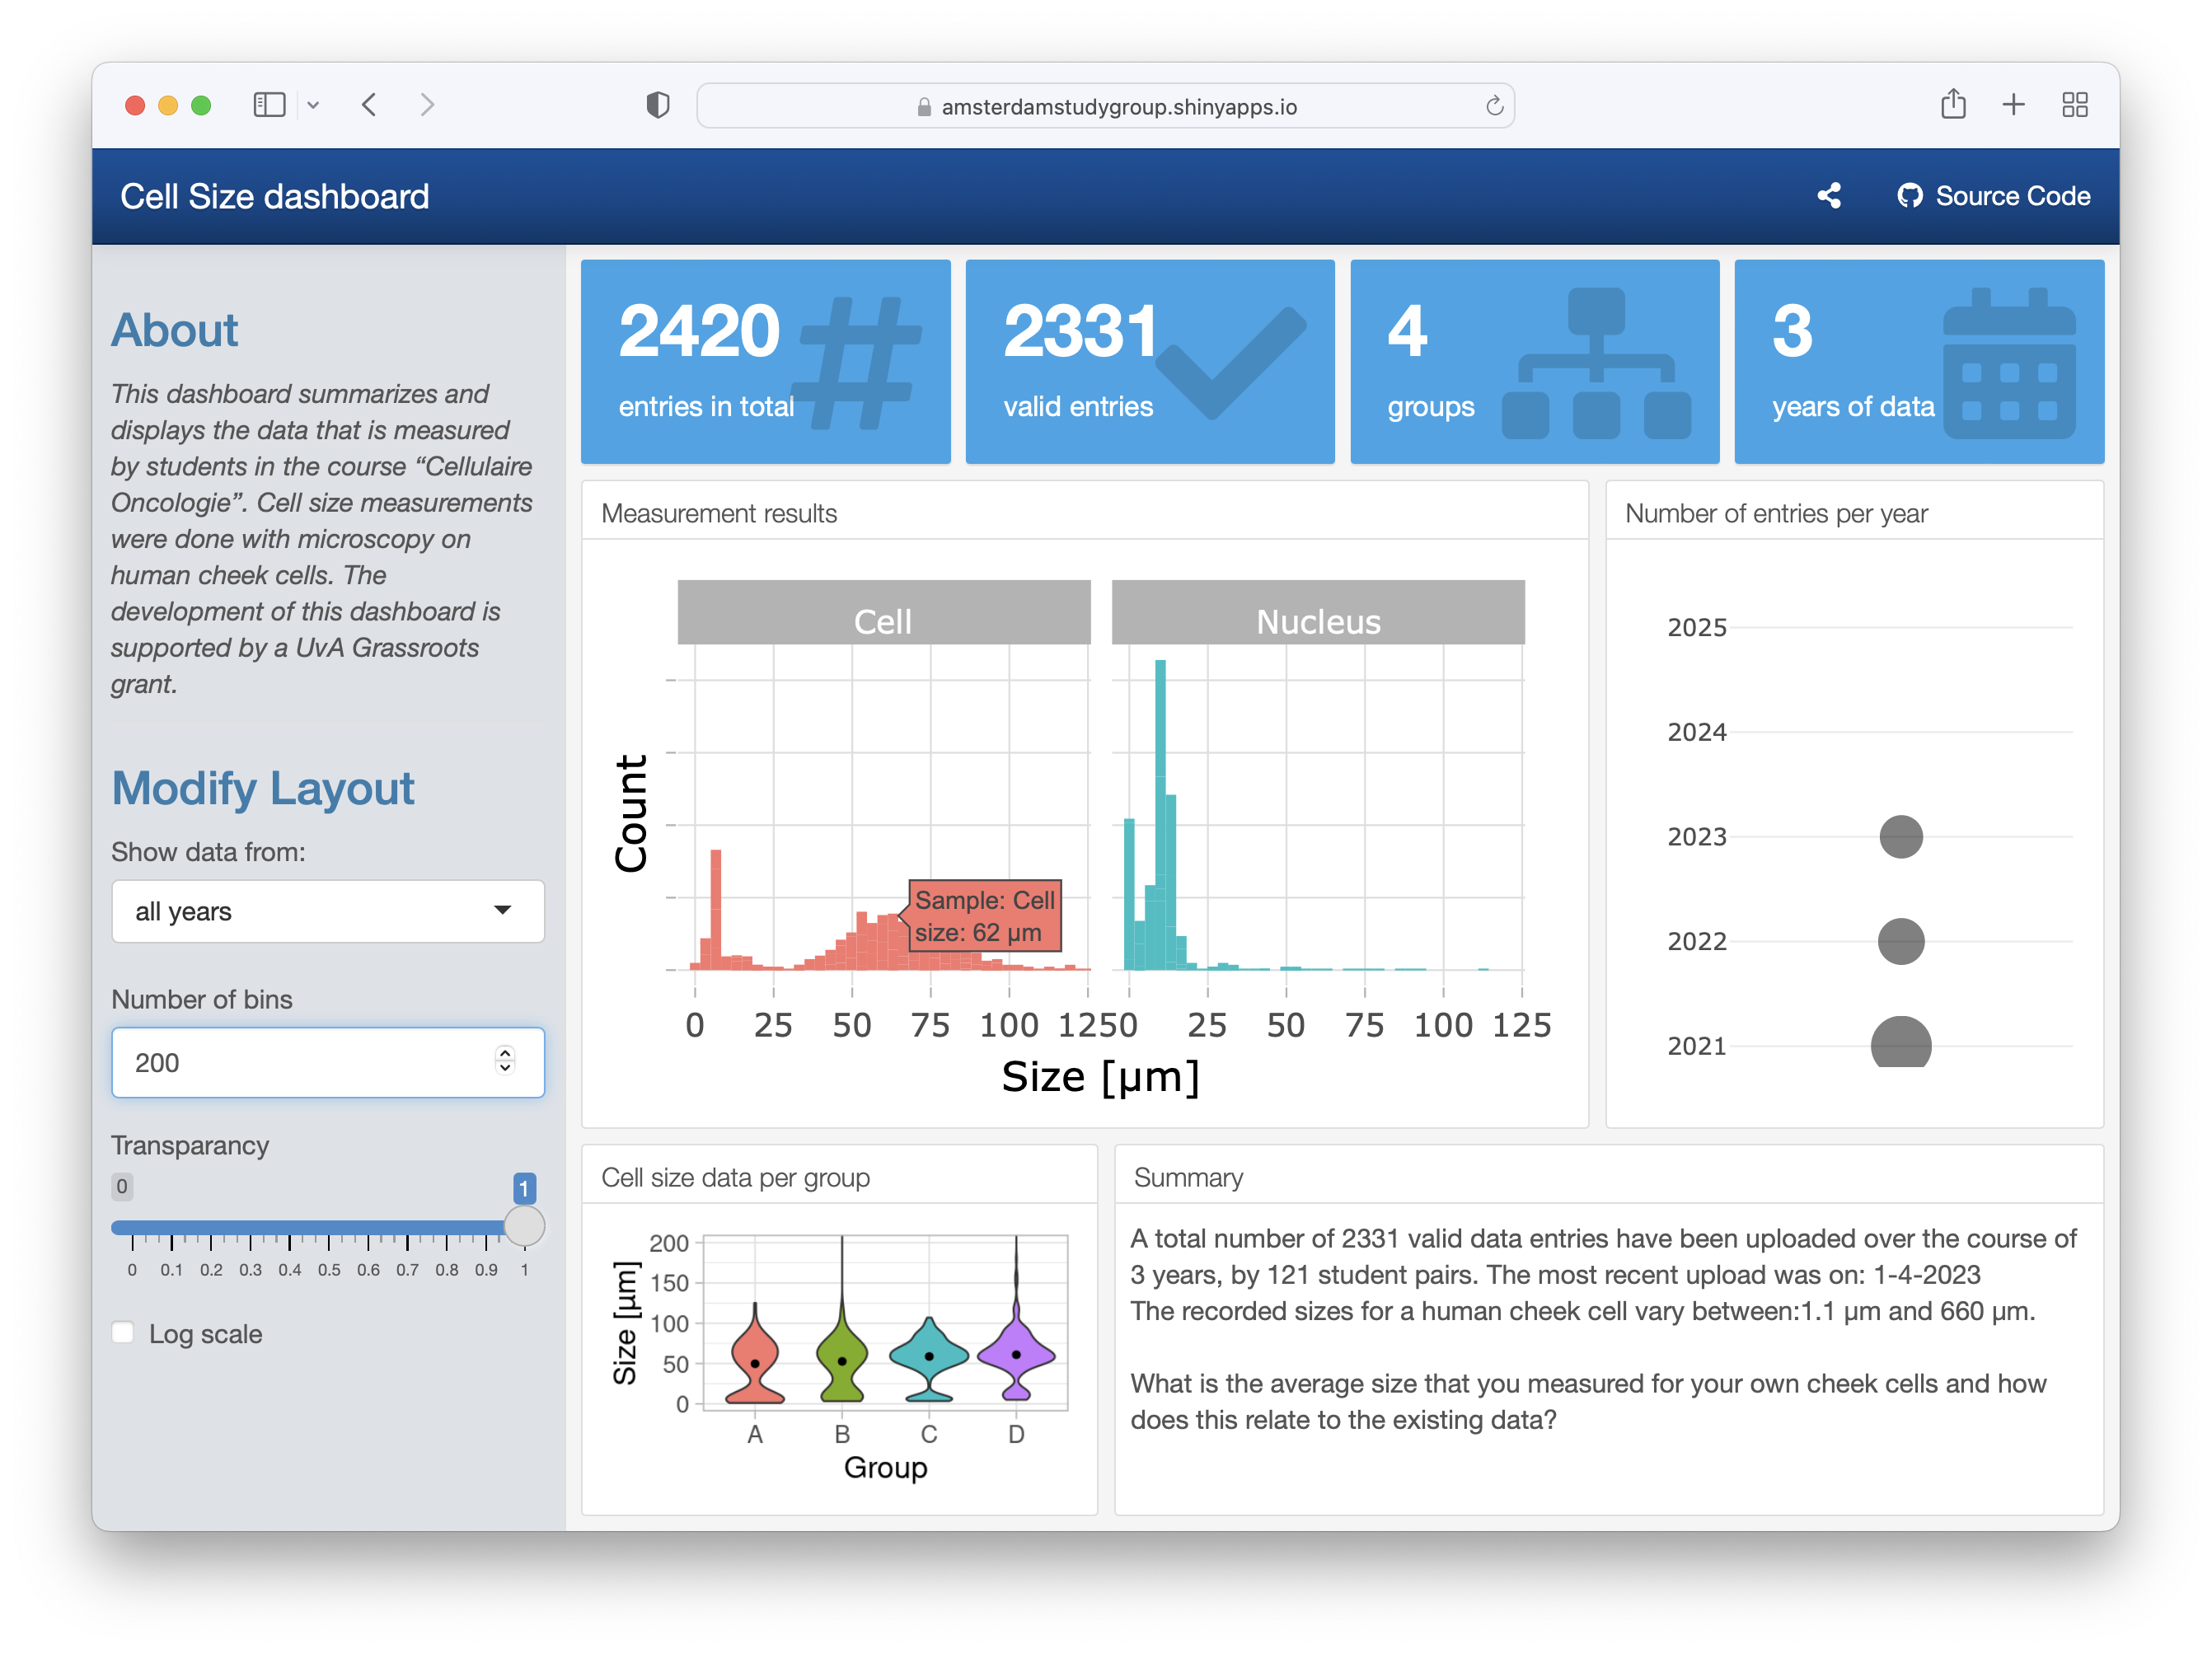{#fig-dashboard }

The dashboard is interactive and users can select the data from all measurements, or from a single year and the number of bins can be adjusted. Additionally, by hovering over the plots, the values of the data can be read (as shown in @fig-dashboard). The dashboard also shows the data for the 4 different groups and the size distribution of the cells by violin plots.

The histogram on the dashboard is the primary data that is useful for the students. It visualizes the distribution of individual data for both the cell and the nucleus. Since the sizes vary susbtantially, the data can be shown on a log-scale as well on the dashboard (@fig-histogram). The main reason that the measurements differ by an order of magnitude, is that the size measurement requires correct calibration of the field of view with a micro ruler. When the calibration is done incorrectly, this will affect the accuracy of the measurement, usually by a factor of 10.

``` python
ggplot(df, aes(x=Size, fill=Sample)) +
  
  geom_histogram(bins = 100, alpha=.8, color='grey40') +
  # scale_x_log10() +
  labs(y="Count", x="Size [µm]") +
  # coord_cartesian(xlim = c(0.5,120)) +
  theme_light(base_size = 16) + theme(axis.text.y = element_blank()) +
  facet_wrap(~Sample) +
  theme(legend.position = "none") +
  
  #Force the y-axis to start at zero
  scale_y_continuous(expand = c(0, NA), limits = c(0,150)) +
  #Apply a logarithmic scale to the x-axis and set the numbers for the scale
  scale_x_log10(breaks = c(1,10,100), limits = c(.5,200)) +
  #Remove minor gridlines
  theme(panel.grid.minor = element_blank()) +
  #Add ticks to the bottom, outside
  annotation_logticks(sides="b", outside = TRUE) +
  #Give a little more space to the log-ticks by adding margin to the top of the x-axis text
  theme(axis.text.x = element_text(margin = margin(t=8))) +
  #Needed to see the tcks outside the plot panel
  coord_cartesian(clip = "off")
```

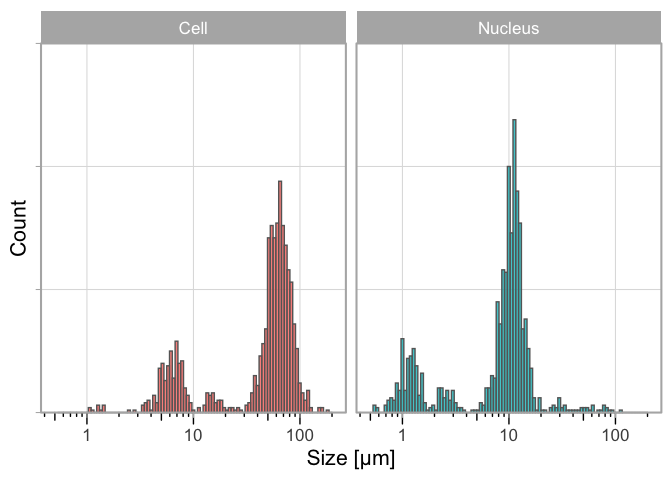

Ideally, the students see the multimodal distrbution and realize that the peaks are an order of magnitude different. Even if they don’t, they will probably assume that the majority of measurements is correct. In any case, it is possible for the students to make a comparison and discuss their results in the context of the historical data.

### Use case 2: Determination of the percentage of cells in S-phase

The aim of the experiment is is to determine the number of cells, as percentage, that is in the S-phase. To this end, students stain cells that are treated with EdU and they use these samples to quantify the percentage of cells in the S-phase in two ways (manual and semi-automated). The results are uploaded via a Google Form. The collected data can be analysed in multiple ways and here we used it to compare the two analysis methods and, secondly, to obtain an estimate for the percentage of S-phase cells. The data on the two analysis methods, manual and automated, is paired and can be visualised by a doplot in which the pairs of the data are connected (@fig-paired-data). The slopes of the lines vary a lot, whereas the average values per year between the two methods is similar. This implies that there can be substantial differences between the two methods, with roughly a similar number of cases where the automated analysis over- or underestimates the percentage, relative to the manual analysis.

``` python
        p <- ggplot(df, aes(x=Analysis, y=S_phase))

        p <- p + geom_point(alpha=0.3)  +
          geom_line(aes(group=Time), alpha=0.3) +
          stat_summary(fun = median, geom = "point", size=6, shape=21, fill="grey", alpha=0.9)
        p <- p + labs(x="", y="S-phase [%]")

        p <- p + coord_cartesian(ylim = c(0,100))

        p <- p + theme_light(base_size = 16) 
        p <- p + facet_wrap(~year)
        p
```

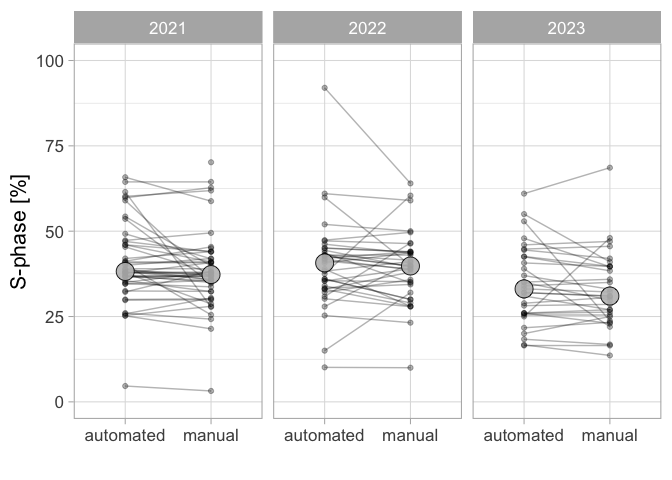

There is increasing attention on effects of experimental design on data analysis and visualization. The recently proposed superplot to distinguish biological and technical replicates is an intuitive and straightforward way to communicate the design \[@lord2020\]. The data on S-phase consists of both technical and biological replicates and is therefore ideally suited to explain the importance of correctly identifying the independent measurements. Here, we treat the data from each group as biological replicate, and the measurements within each group as a technical replicate. The reason is that a group of students all stain cells that are from the same passage number and treated at the same time and is therefore a technical replicate. On the other hand, different groups stain different passages of cells and so we treat these as independent observations. When the data is plotted for each individual technical replicate (@fig-superplot), it can be observed that we received multiple submissions per group, leading to a precise measurement per group. The median values range from 23% to 44%. The average value of the independent observations is 36.7% \[N=12, 95%CI: 33.0%-40.3%\].

``` python
p <- p + geom_flat_violin(color=NA, scale = "width", width=0.6,position = position_nudge(x = .25, y = 0), trim=FALSE, alpha = 0.8)

p <-  p + stat_summary(fun = mean, geom = "point", shape=21, stroke = .3, size=4, color="black", alpha=1)

p <- p + scale_fill_viridis_d(begin=0.3, end=0.7)
p <- p + scale_color_viridis_d(begin=0.3, end=0.7) 
p <- p + labs(x="Replicate", y="S-phase [%]")
p <- p + theme(axis.text.x = element_blank())

p
```

    Warning: Using the `size` aesthietic with geom_polygon was deprecated in ggplot2 3.4.0.
    ℹ Please use the `linewidth` aesthetic instead.

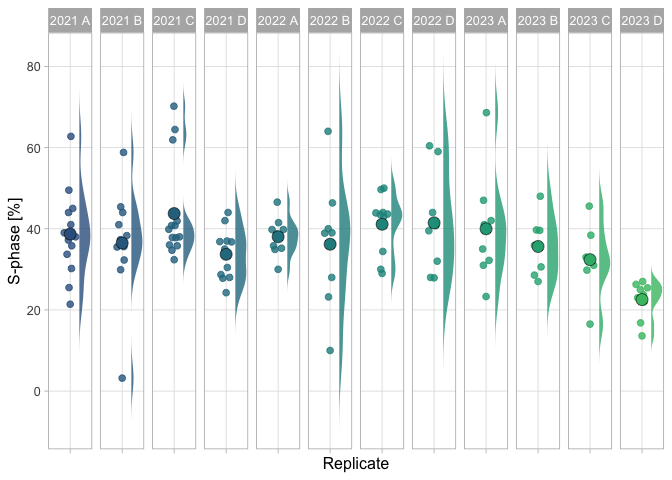

## Discussion

Data that is generated in courses is often recorded by individual students or groups of students in reports. However, it can be valuable and interesting to collect and use these data. Here, I present a flexible and straightforward approach to collect and display data from a large group of students and over several years. A combination of Google Forms/Sheets for data collection and R for data processing and visualization is used.

In the first use case, the data is displayed in dashboard style. The dashboard gives a quick, interactive and complete overview of the data and it is used by students to evaluate their results. The aggregation of thet data and presentation on the dashboard is a nice reward for the students as they see that their data has value and is re-used by their peers.

In the second use case, a quarto template is used to process and visualize the data. The use case shows how two methods can be compared and also shows that a high number of truly independent observations can be collected.

For both use cases, the code is available and can be used as a starting point for the processing and visualization of other datasets. The approach that is presented here is not limited to practical courses. It can also be used to collect data from other crowds, or in collaborative science projects.

Collecting and reusing the data has a number of advantageous aspects. First, a high number of measurements increases the precision of the measurement and therefore allows us to obtain precise numbers. Second, the historical data can be shared with the students and they can interpret and discuss their results in light of the existing data. Third, the obtained data serves as material that can be used to teach data manipulation, statistics and data visualization which is a fundamental aspect of science \[@sailem2016\]. The use cases described in this paper deal with these aspects.

The aggregation of the data inevitably leads to a discussion on experimental design, as this is important to establish whether measurements are independent or not. This aspect of experimental design has received attention over the last years \[@Aarts2015; @sikkel2017; @eisner2021\] and it is valuable to teach this aspect of data analysis and visualization. Although I have not implemented this yet, I think that having students participate in the data aggregation, creates a very practical opportunity to teach experimental design and the identification of biological units \[@lazic2018\]. In addition, it may stimulate cooperative learning \[@tanner2003\].

In conclusion, I feel it is valuable to collect data from practical courses and here we report one way to achieve that. I hope that serves as a starting point for others that want to collect, store and use data from large groups of students.

### Data availability

The data is available at: <https://doi.org/10.5281/zenodo.8359955>

### Code availability

The code for this manuscript is available here: <https://github.com/JoachimGoedhart/MS-StudentSourcing> and it includes the notebook that was generated to analyze the S-phase data: <https://github.com/JoachimGoedhart/MS-StudentSourcing/tree/main/notebooks> The code for the dashboard ‘CellSizeR’ is deposited here: <https://github.com/JoachimGoedhart/CellSizeR>

Versioned code with a DOI will be made available upon acceptance.

### Contributions

J.G. conceived the project, acquired funding, wrote code, and wrote the manuscript.

### Competing interests

The authors declare no competing interests

### Acknowledgments

A [blog post by Garrick Aden-Buie](https://www.garrickadenbuie.com/blog/use-google-forms-and-r-to-track-data-easily/) was very helpful in the initial phase of this project. Many thanks to the people involved in Quarto, which was used to write and shape this paper. Most importantly, I’d like to thank all students involved in the course that have generously shared their data, making this project a success.

## References